# Clustering Assignment

### Overview

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


The job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

Now the above problem can be solved using Clustering approach. We need to use the provided dataset and apply clustering algorithms such as KMeans and Hierarchical algorithms to find the top 5 countries that are in dire need of aid. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

# Step 1: Data Reading and Describing

In [2]:
country = pd.read_csv('./data/Country-data.csv');
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Shape of country dataframe giving us number of rows and columns
country.shape

(167, 10)

In [4]:
# Data info gives us type of param and non-null row count
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### It shows that there is no null data in the dataframe. 

In [5]:
# Checking the statistics of the Dataframe
country.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.97, 0.98, 0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
97%,130.140000,87.038000,11.802000,92.768000,62496.000000,23.626000,81.902000,6.230600,52218.000000
98%,145.160000,100.056000,11.900000,105.760000,74208.000000,25.988000,82.000000,6.450400,66364.000000


# Step 2: Data Preparation
### As `imports`, `exports` and `health` columns are % values of `gdpp`, we will convert them to numeric values. 

In [6]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
country['imports'] = country['imports'] * country['gdpp']
country['exports'] = country['exports'] * country['gdpp']
country['health'] = country['health'] * country['gdpp']

In [8]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610,9.44,56.2,5.82,553
1,Albania,16.6,114520.0,26789.50,198774.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,171264.0,18598.20,140044.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,219919.0,10060.50,151437.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100,1.44,76.8,2.13,12200


In [9]:
country.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.97, 0.98, 0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7.420619e+05,105673.320419,6.588352e+05,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.797389e+06,180140.890556,1.471081e+06,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920e+02,1282.120000,6.510920e+01,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,4.471400e+04,7853.550000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.600000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.000000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,3.138510e+06,496670.100000,2.424156e+06,48290.000000,20.870000,81.400000,5.861000,48610.000000
97%,130.140000,3.636762e+06,599822.600000,3.250746e+06,62496.000000,23.626000,81.902000,6.230600,52218.000000
98%,145.160000,4.648093e+06,766362.000000,3.765140e+06,74208.000000,25.988000,82.000000,6.450400,66364.000000


# Step 3 Exploratory Data Analysis and Visualization

- Univariate Analysis
- Check outliers
- Bivariate Analysis

## Univariate Analysis

### Let's see the distribution of various characteristics

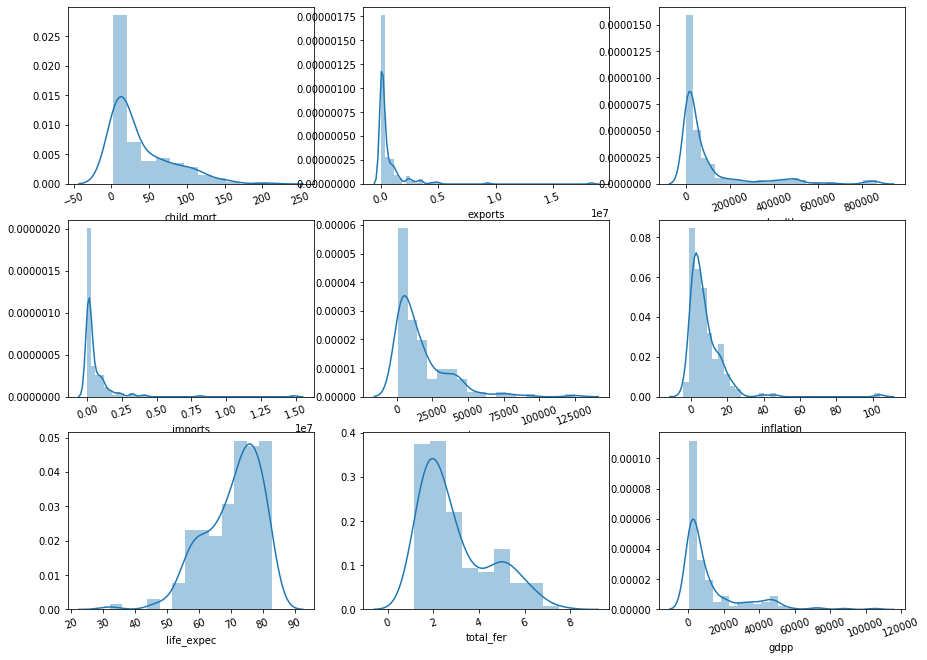

In [10]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', ]
for i in enumerate(features): 
    ax = plt.subplot(4, 3, i[0]+1)
    sns.distplot(country[i[1]])
    plt.xticks(rotation = 20)

#### As we can see the data is for `life_expec` is negatively skewed while all other are positively skewed. 

## Identifying outliers in the data

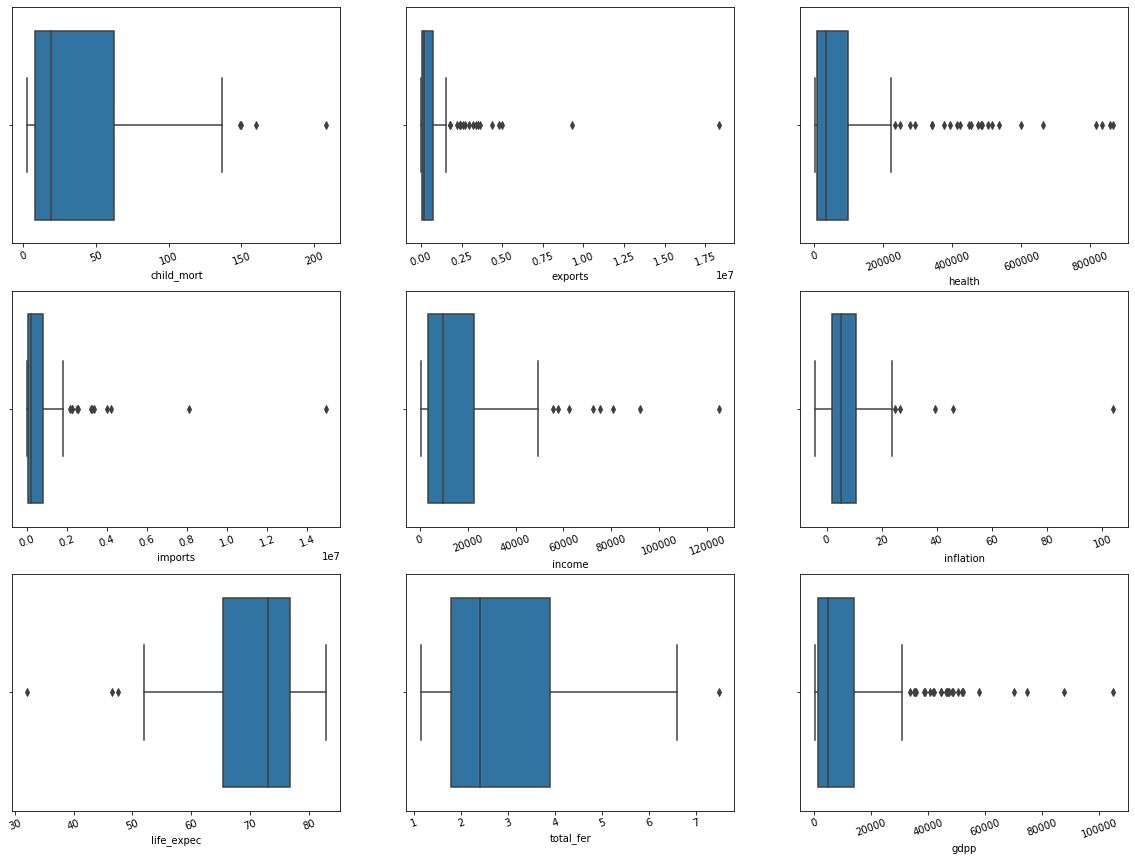

In [11]:
plt.figure(figsize=(20,20))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', ]
for i in enumerate(features): 
    ax = plt.subplot(4, 3, i[0]+1)
    sns.boxplot(x=i[1], data=country)
    plt.xticks(rotation = 20)

### Capping the outliers

In [12]:
# income
Q1 = country['child_mort'].quantile(0.01)
Q4 = country['child_mort'].quantile(0.99)
country['child_mort'][country['child_mort'] <= Q1]=Q1
country['child_mort'][country['child_mort'] >= Q4]=Q4
# sns.boxplot(x='child_mort', data=country);

In [13]:
# child_mort
Q1 = country['exports'].quantile(0.01)
Q4 = country['exports'].quantile(0.99)
country['exports'][country['exports'] <= Q1]=Q1
country['exports'][country['exports'] >= Q4]=Q4
# sns.boxplot(x='exports', data=country);

In [14]:
# gdpp
Q1 = country['imports'].quantile(0.01)
Q4 = country['imports'].quantile(0.99)
country['imports'][country['imports'] <= Q1]=Q1
country['imports'][country['imports'] >= Q4]=Q4
# sns.boxplot(x = 'imports', data=country);

In [15]:
Q1 = country['income'].quantile(0.01)
Q4 = country['income'].quantile(0.99)
country['income'][country['income'] <= Q1]=Q1
country['income'][country['income'] >= Q4]=Q4
# sns.boxplot(x = 'income', data=country);

In [16]:
Q1 = country['inflation'].quantile(0.01)
Q4 = country['inflation'].quantile(0.99)
country['inflation'][country['inflation'] <= Q1]=Q1
country['inflation'][country['inflation'] >= Q4]=Q4
# sns.boxplot(x = 'inflation', data=country);

In [17]:
Q1 = country['gdpp'].quantile(0.01)
Q4 = country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp'] <= Q1]=Q1
country['gdpp'][country['gdpp'] >= Q4]=Q4
# sns.boxplot(x = 'gdpp', data=country);

### Analysing the data after Capping of outliers

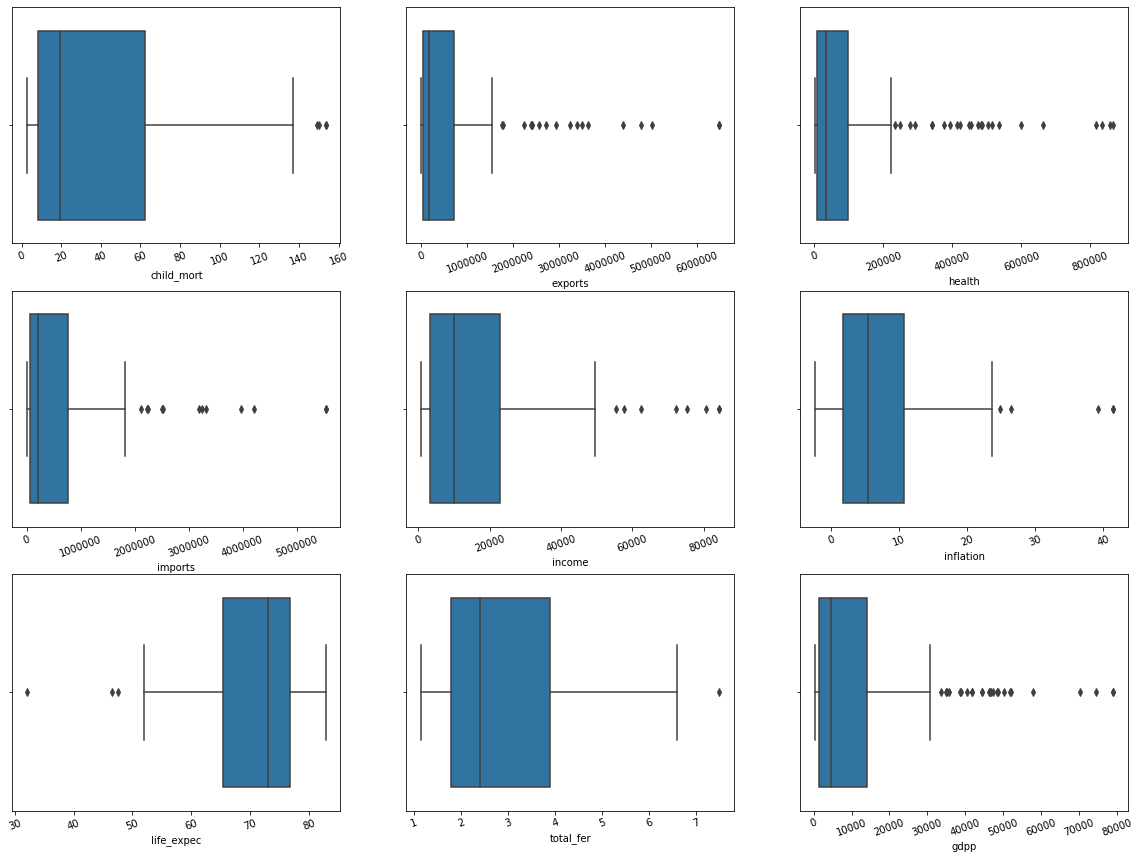

In [18]:
plt.figure(figsize=(20,20))
for i in enumerate(features): 
    ax = plt.subplot(4, 3, i[0]+1)
    sns.boxplot(x=i[1], data=country)
    plt.xticks(rotation = 20)

In [19]:
country.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.97, 0.98, 0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6.538351e+05,105673.320419,5.873845e+05,16858.601677,7.397332,70.555689,2.947964,12757.456527
std,39.026793,1.141523e+06,180140.890556,9.422260e+05,17956.060832,7.770993,8.893172,1.513848,17429.755235
min,2.800000,2.224372e+03,1282.120000,1.049096e+04,742.240000,-2.348800,32.100000,1.150000,331.620000
25%,8.250000,4.471400e+04,7853.550000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.600000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.000000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,3.138510e+06,496670.100000,2.424156e+06,48290.000000,20.870000,81.400000,5.861000,48610.000000
97%,130.140000,3.636762e+06,599822.600000,3.250746e+06,62496.000000,23.626000,81.902000,6.230600,52218.000000
98%,145.160000,4.648093e+06,766362.000000,3.765140e+06,74208.000000,25.988000,82.000000,6.450400,66364.000000


## Bivariate Analysis

### Let's visualize the variables using a pair plot

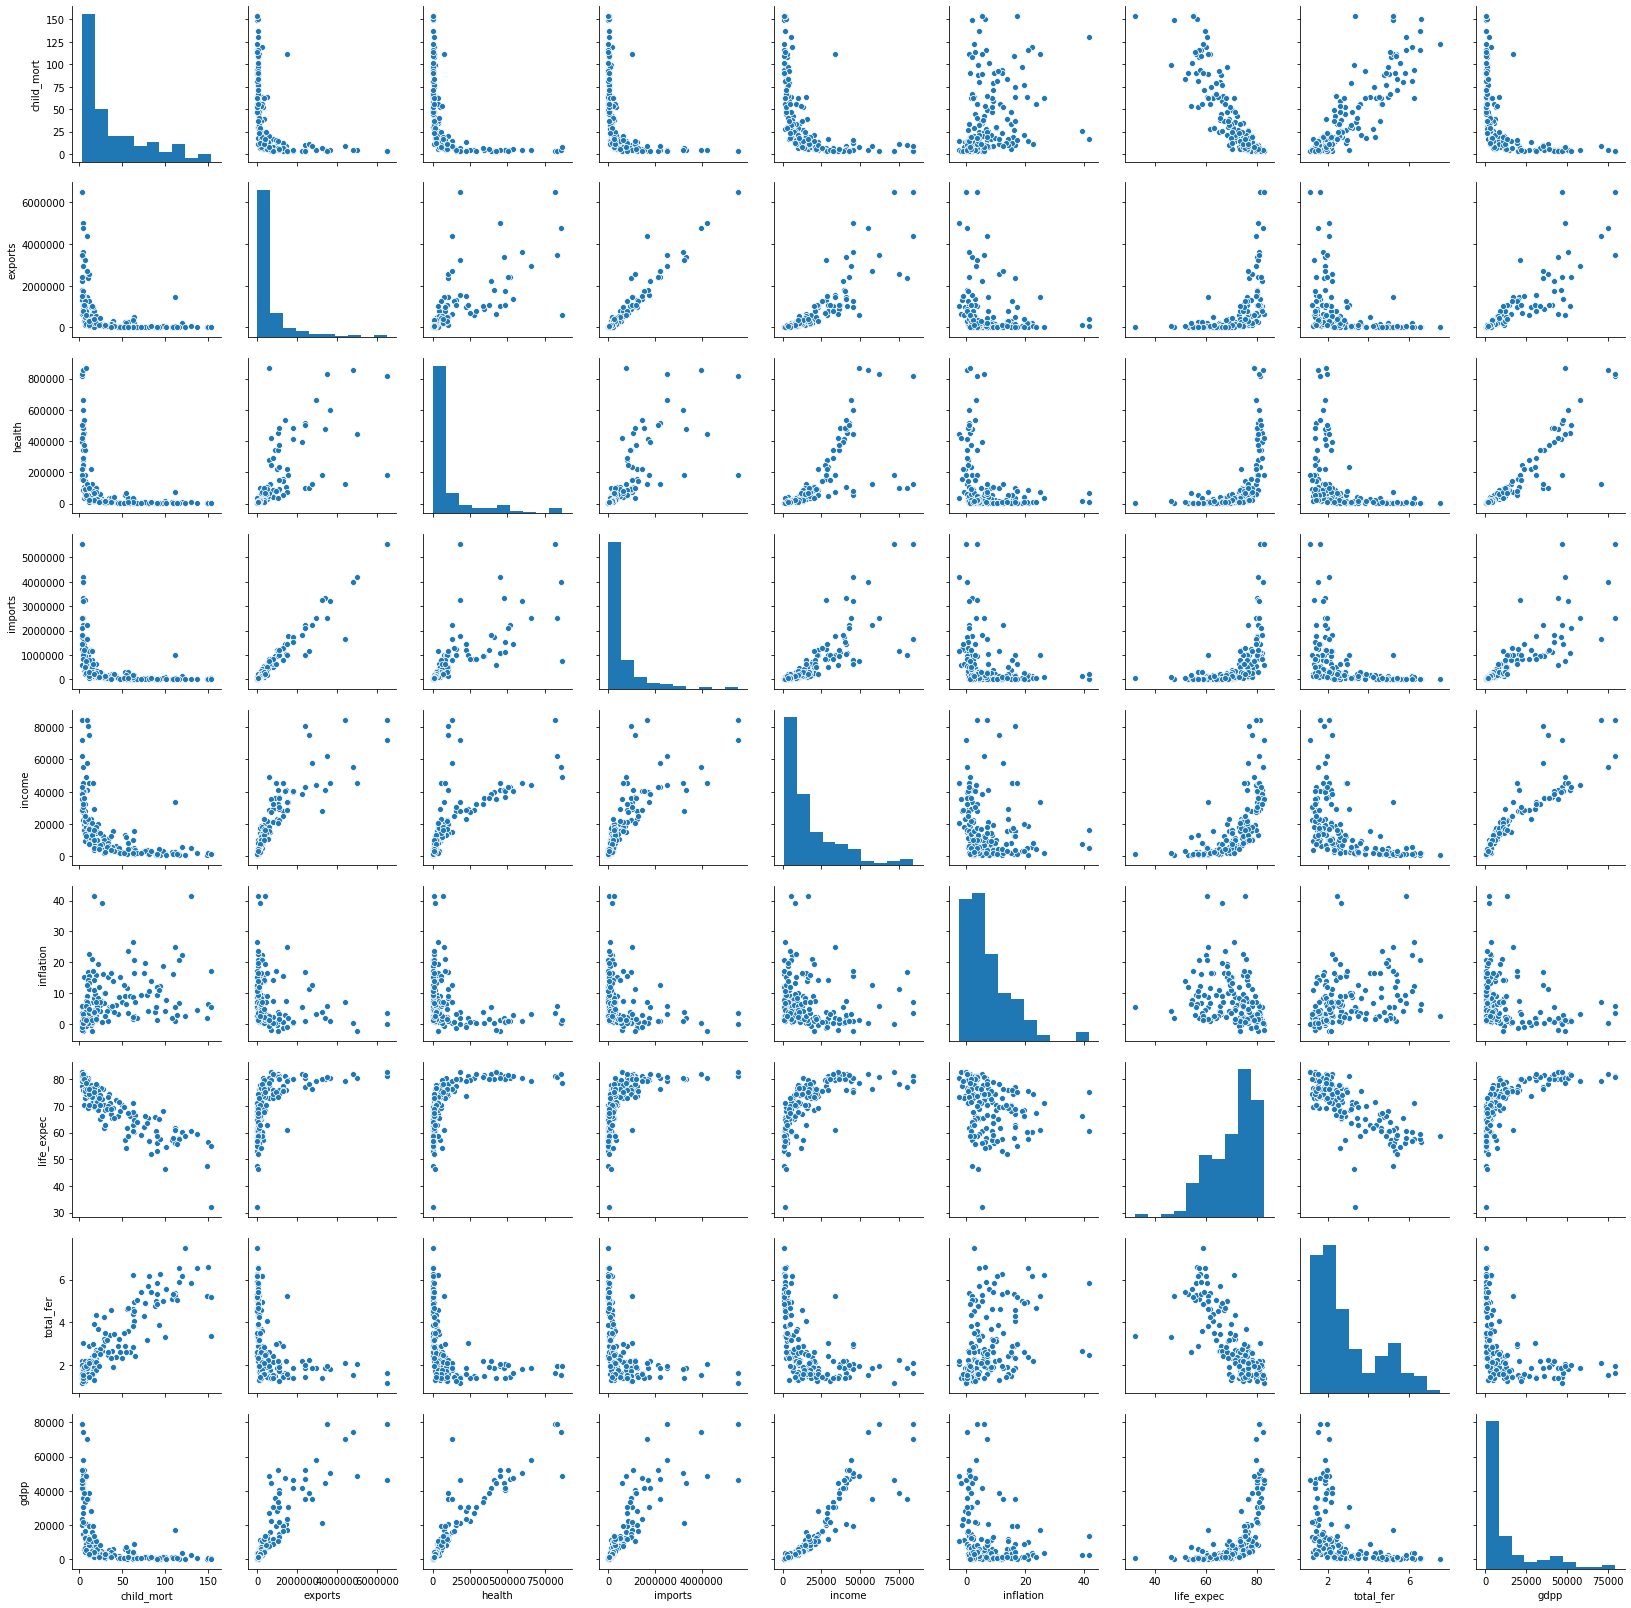

In [20]:
sns.pairplot(country);

### We can draw following inferences from above plot
1. Higher the GDP per Capita in any country, higher are the expenses on Health
2. More the country spends on health expenses, the less is the child mortality rate.
3. As the Health expenditure increases in a country beyond 200000, the life expectancy reaches to 80. But under that the life expectancy is clustered between 60-80.
4. As the inflation reaches beyond 10 the Health expenditure decreases in a country.

# Step 4: Clustering 
1. Calculate Hopkins statistics
2. Data Scaling
3. K Means Clustering
4. Hierarchical Clustering

## 1. Hopkins Check

In [21]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

### Let's run the hopkins method to see if our data set is ideal for clustering or not.

In [22]:
hopkins(country.drop('country', axis = 1))

0.9269222373235475

#### It can be seen that the `country` data set is highly clusterable (the H value = 0.98 which is far above the threshold 0.5)

## 2. Data Scaling

In [23]:
df1 = country.drop('country', axis = 1)
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

In [24]:
df1 = pd.DataFrame(df1)
df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.565040,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.439218,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.484826,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.532363,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178771,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


## 3. K-Means Clustering 

## Finding the optimum number of clusters

### Method 1 : Silhouette Analysis
#### Let's first check the `Silhouette Score` plot to find the optimum number of clusters

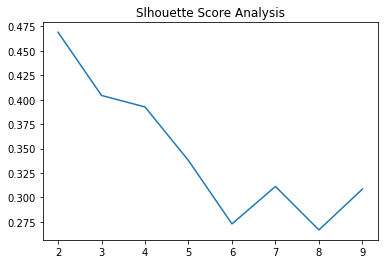

In [25]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.title('Slhouette Score Analysis')
plt.show()

#### Looking at the above curve, we can go ahead with 3 clusters

### Method 2 : Elbow Curve 
#### Let's also check the `Elbow Curve` to find the optimum number of clusters

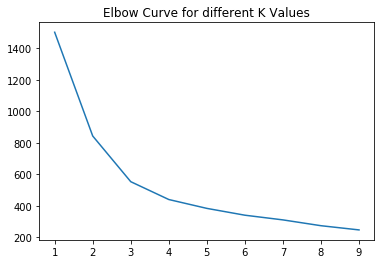

In [26]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);
plt.title('Elbow Curve for different K Values')
plt.show()

#### The above curve also suggests at the value 3. So we can go ahead with 3 clusters

In [27]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [28]:
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [29]:
col = country.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [30]:
# Assign the cluster id's to each clusters
df_km = pd.concat([country.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp',  'cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,2


In [31]:
# Verify if we have any null data
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [32]:
# Count the number of countries in each cluster
df_km.cluster_id.value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

#### So there are 90 countries in `Cluster 2`, 48 in `Cluster 1` and 29 in `Cluster 0`

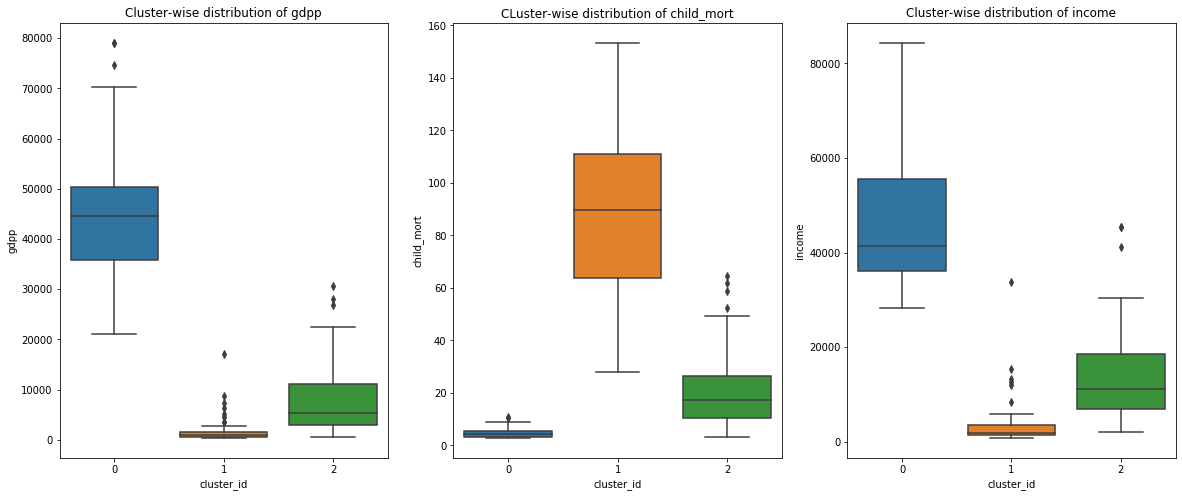

In [68]:
# Plot
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='gdpp', data=df_km);
plt.title('Cluster-wise distribution of gdpp')
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='child_mort', data=df_km);
plt.title('CLuster-wise distribution of child_mort')
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='income', data=df_km);
plt.title('Cluster-wise distribution of income')
plt.show()

### So as evident from above, 
- the `Cluster 0` has high `gdpp` and `income` per person. Thus the `child_mort`, i.e., child mortality rate is too low for that. 
- the `Cluster 1` has low `gdpp` and low `income` per person. Thus the child mortality rate is high for countries in this cluster.

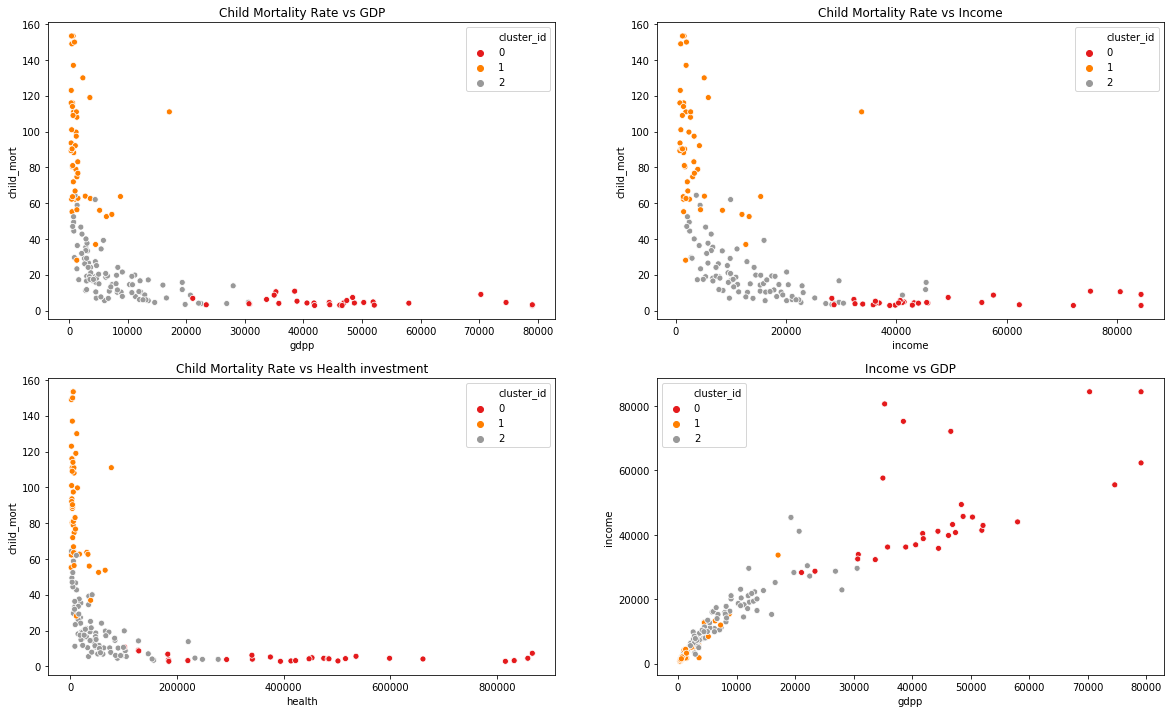

In [34]:
# Plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.title('Child Mortality Rate vs GDP')
plt.subplot(2,2,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.title('Child Mortality Rate vs Income')
plt.subplot(2,2,3)
sns.scatterplot(x = 'health', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.title('Child Mortality Rate vs Health investment')
plt.subplot(2,2,4)
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.title('Income vs GDP')
plt.show()

### So evidently from above plots, we can see that we have 3 clear clusters which shows that increase in `gdpp`, `income` or expenses in `health` for any country, decreases the child mortality rate. 

## Cluster Profiling 

In [35]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,2


In [36]:
df_analysis = df_km.drop('country', axis=1)
df_analysis.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,1
1,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,1
4,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,2


In [37]:
df_analysis.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,4.989655,2.540536e+06,425387.965517,2.131670e+06,47784.413793,2.906731,80.479310,1.754138,46068.137931
1,90.335417,8.790977e+04,11482.176458,8.273279e+04,3901.010000,10.608604,59.239583,4.992083,1911.400833
2,20.547778,3.477251e+05,52889.433778,3.589292e+05,13804.333333,7.131624,73.393333,2.242444,7808.577778


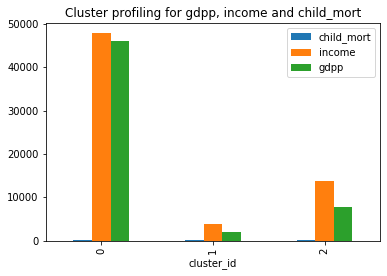

In [38]:
df_analysis.groupby('cluster_id')['child_mort', 'income', 'gdpp'].mean().plot(kind = 'bar')
plt.title('Cluster profiling for gdpp, income and child_mort')
plt.show()

### As the `child_mort` field is not visible or comparable in the plot, we will amplify it by multiplying the values by 1000 and then plot again.

In [39]:
df_analysis['child_mort'] = df_analysis['child_mort'] * 1000;
df_analysis.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90200.0,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,1
1,16600.0,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,2
2,27300.0,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,2
3,119000.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,1
4,10300.0,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,2


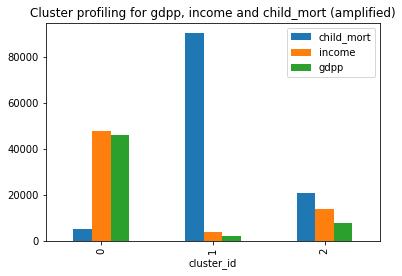

In [40]:
df_analysis.groupby('cluster_id')['child_mort', 'income', 'gdpp'].mean().plot(kind = 'bar')
plt.title('Cluster profiling for gdpp, income and child_mort (amplified)')
plt.show()

### Now as visible, for Cluster with cluster_id 1, the `income` and `gdpp` have low values and correspondingly high child mortality rate, i.e., `child_mort`

In [41]:
# Now let's scale down the `child_mort` column again
df_analysis['child_mort'] = df_analysis['child_mort'] / 1000
df_analysis.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,1
1,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,1
4,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,2


### As required, the countries with low `income` and `gdpp` and high `child_mort` shall be the ones in the dire need of aid, so let's get the list of those

In [42]:
df_km[df_km['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

#### Let's sort the countries in the order of the ones that need the aid most on top. So we will sort on the basis of descending `child_mort` and ascneding for `income` and `gdpp`

In [43]:
df_required = df_km[df_km['cluster_id']==1].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False]) 
df_required = df_required.reset_index().drop(['index', 'cluster_id'], axis=1)

In [44]:
# List of top 5 countries in need of aid. 
df_required.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Liberia,89.3,6245.7000,3858.60,30280.200,742.24,5.47,60.8,5.02,331.62
1,Burundi,93.6,2224.3716,2679.60,10490.964,764.00,12.30,57.7,6.26,331.62
2,"Congo, Dem. Rep.",116.0,13727.4000,2641.94,16566.400,742.24,20.80,57.5,6.54,334.00
3,Niger,123.0,7725.6000,1795.68,17086.800,814.00,2.55,58.8,7.49,348.00
4,Sierra Leone,153.4,6703.2000,5226.90,13765.500,1220.00,17.20,55.0,5.20,399.00


# 4. Hierarchical Clustering  

## Step 1: Data Scaling

In [45]:
standard_scaler = StandardScaler()
df = country[['child_mort', 'income', 'gdpp']]
country_df = standard_scaler.fit_transform(df)
country_df.shape

(167, 3)

In [46]:
country_df = pd.DataFrame(country_df)
country_df.columns = ['child_mort', 'income', 'gdpp']
country_df.head()

,child_mort,income,gdpp
0,1.344012,-0.851772,-0.702314
1,-0.547543,-0.387025,-0.498775
2,-0.272548,-0.221124,-0.477483
3,2.084186,-0.612136,-0.531000
4,-0.709457,0.125202,-0.032079


## Step 1: Find the optimum number of clusters
    - Single Linkage
    - Complete Linkage


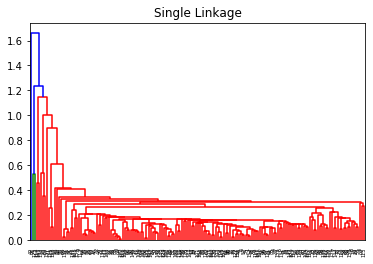

In [47]:
clusters = linkage(country_df, method='single', metric='euclidean')
dendrogram(clusters)
plt.title('Single Linkage')
plt.show()

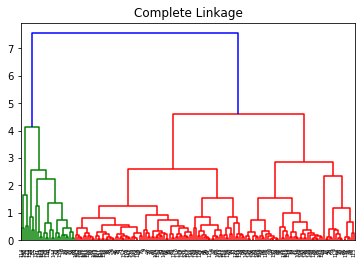

In [48]:
clusters = linkage(country_df, method='complete', metric='euclidean')
dendrogram(clusters)
plt.title('Complete Linkage')
plt.show()

### As we can see here, there are 3 clear clusters from the above dendo

In [49]:
cluster_labels = cut_tree(clusters, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [50]:
country_df['cluster'] = cluster_labels
country_df.head()

,child_mort,income,gdpp,cluster
0,1.344012,-0.851772,-0.702314,0
1,-0.547543,-0.387025,-0.498775,1
2,-0.272548,-0.221124,-0.477483,1
3,2.084186,-0.612136,-0.531000,0
4,-0.709457,0.125202,-0.032079,1


In [51]:
# Verify if we have the right clustering data
country_df.isnull().sum()

child_mort    0
income        0
gdpp          0
cluster       0
dtype: int64

In [52]:
# Now let's see the number of countries in each cluster
country_df.cluster.value_counts()

1    85
0    55
2    27
Name: cluster, dtype: int64

### Now let's visualize each cluster

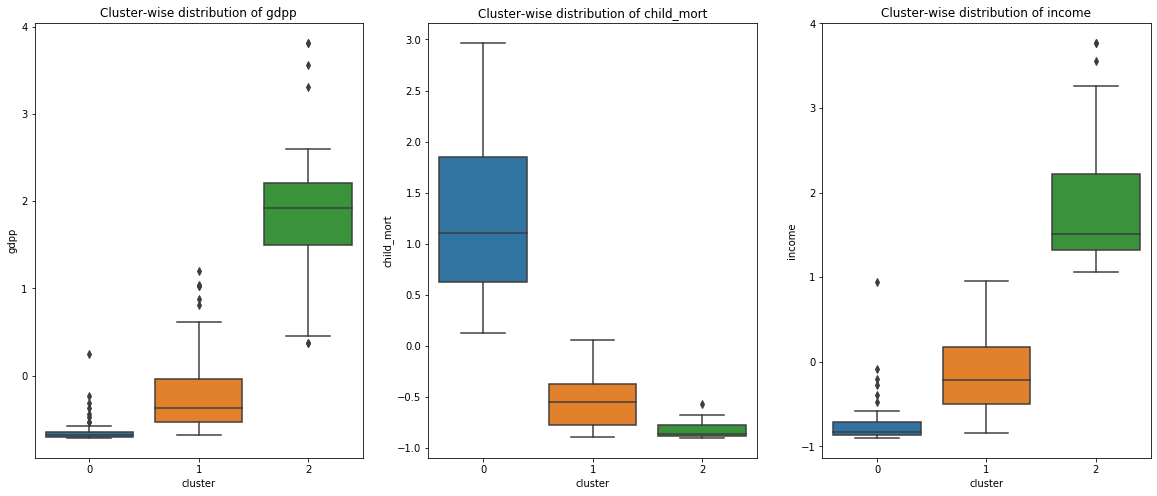

In [53]:
# Plot
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster', y='gdpp', data=country_df);
plt.title('Cluster-wise distribution of gdpp')
plt.subplot(1,3,2)
sns.boxplot(x='cluster', y='child_mort', data=country_df);
plt.title('Cluster-wise distribution of child_mort')
plt.subplot(1,3,3)
sns.boxplot(x='cluster', y='income', data=country_df);
plt.title('Cluster-wise distribution of income')
plt.show()

### As clearly visible, 
- the `Cluster 2` has high `gdpp` and `income` per person. Thus the `child_mort`, i.e., child mortality rate is too low for that. 
- the `Cluster 0` has low `gdpp` and low `income` per person. Thus the child mortality rate, `child_mort` is high for countries in this cluster.

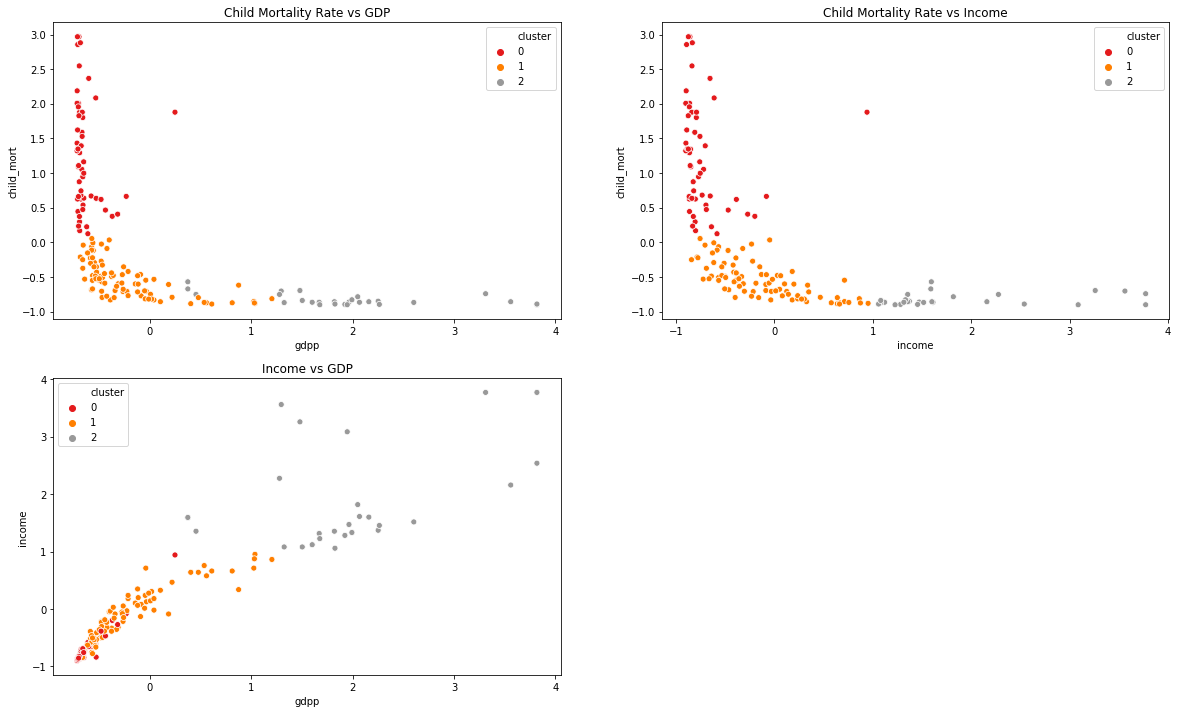

In [54]:
# Plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster', legend = 'full', data = country_df, palette='Set1');
plt.title('Child Mortality Rate vs GDP')
plt.subplot(2,2,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster', legend = 'full', data = country_df, palette='Set1');
plt.title('Child Mortality Rate vs Income')
plt.subplot(2,2,3)
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster', legend = 'full', data = country_df, palette='Set1');
plt.title('Income vs GDP')
plt.show()

### So evidently from above plots, we can see that we have 3 clear clusters which shows that increase in `gdpp`, `income` or expenses in `health` for any country, decreases the child mortality rate. 

## Cluster Profiling

In [55]:
df = country
df['cluster_id'] = country_df['cluster']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,1


In [56]:
df.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,86.160000,8.356041e+04,10115.580182,7.832289e+04,3849.608727,10.122964,60.610909,4.646727,1813.986182
1,16.872941,4.157436e+05,67476.854118,4.439997e+05,14609.529412,6.621167,74.007059,2.185176,9119.411765
2,5.818519,2.565053e+06,420576.111111,2.075759e+06,50438.814815,4.288600,79.948148,1.888889,46502.814815


In [57]:
df.child_mort = df.child_mort * 1000

In [58]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90200.0,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16600.0,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27300.0,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119000.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10300.0,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,1


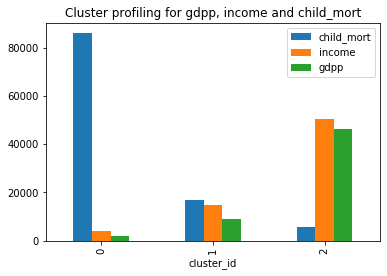

In [59]:
df.groupby('cluster_id')['child_mort', 'income', 'gdpp'].mean().plot(kind = 'bar')
plt.title('Cluster profiling for gdpp, income and child_mort')
plt.show()

#### Now as visible, for Cluster with cluster_id 0, the `income` and `gdpp` have low values and correspondingly high child mortality rate, i.e., `child_mort`

#### As required, the countries with low `income` and `gdpp` and high `child_mort` shall be the ones in the dire need of aid, so let's get the list of those

In [60]:
# Scale down the child_mort column
df.child_mort = df.child_mort / 1000
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,1


In [61]:
df[df['cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
12                   Bangladesh
17                        Benin
18                       Bhutan
19                      Bolivia
21                     Botswana
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93      

#### Let's sort the countries in the order of the ones that need the aid most on top. So we will sort on the basis of descending `child_mort` and ascneding for `income` and `gdpp`

In [62]:
df_required = df[df['cluster_id']==0].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False]) 
df_required = df_required.reset_index().drop(['index', 'cluster_id'], axis=1)

In [63]:
# List of top 5 countries in need of aid. 
df_required.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Liberia,89.3,6245.7000,3858.60,30280.200,742.24,5.47,60.8,5.02,331.62
1,Burundi,93.6,2224.3716,2679.60,10490.964,764.00,12.30,57.7,6.26,331.62
2,"Congo, Dem. Rep.",116.0,13727.4000,2641.94,16566.400,742.24,20.80,57.5,6.54,334.00
3,Niger,123.0,7725.6000,1795.68,17086.800,814.00,2.55,58.8,7.49,348.00
4,Sierra Leone,153.4,6703.2000,5226.90,13765.500,1220.00,17.20,55.0,5.20,399.00


## Now as we can see, using both the clustering methods, **KMeans** and **Hierarchical** clustering, the final list of the top 5 countries which requires aid on priority is same.

# Final Country List

| Rank |  country           |
|------|--------------------|
|   1  |  Liberia           |
|   2  |  Burundi           |
|   3  |  Congo, Dem. Rep.  |
|   4  |  Niger             |
|   5  |  Sierra Leone      |
